

#### PERFORMANCE ANALYSIS OF MACHINE LEARNING ALGORITHMS FOR MONITORING HUMAN ACTIVITY RECOGNITION 





### DNN Algorithm 


The purpose of this thesis is to predict human behavior based upon wearable sensor data and Smartphone data and perform a comparative study of performance between multiple classification algorithms. We will be using publicly available UCI data set for this study. As this data is not derived from our experiment, so it becomes crucial to check the dataset for all the data quality issues. Otherwise, data quality issues can provide irrelevant results, so in order to prepare data for building models,

1. Data load
2. Standardization of the datset
3. Splitting of Original Dataset between test and train
4. Model Building

**** 1. Data Load***

***

In [1]:
### import all the required Library

import pandas as pd
import numpy as np
import glob
import missingno as msno 
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load the data 
df_data_Dummy=pd.read_csv("df_data_Dummy.csv")

In [3]:
df_data_Dummy.head()

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Activity Label,Room_2,Gender_M
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,0,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,0,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,0,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,0,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,0,1


**2. Divide between X and Y**

In [4]:
Output =['Activity Label']
Features=['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
      'id_Antenna', 'RSSI', 'Phase', 'Freq']

In [5]:
## Devide the data between X and Y
X= df_data_Dummy.drop(Output,1)
Y=df_data_Dummy[Output]

In [6]:
#Standardize the inputs
normalize=Normalizer()
#features = 
X[Features] = normalize.fit_transform(X[Features])

from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#X[Features] = scaler.fit_transform(X[Features])

In [7]:
## Print X after normalization
X

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Room_2,Gender_M
0,0.000000,0.000294,0.001088,-0.000089,0.001079,-0.068542,0.002618,0.997644,0,1
1,0.000541,0.000294,0.001091,-0.000089,0.001082,-0.068188,0.005127,0.997658,0,1
2,0.001620,0.000484,0.000990,-0.000015,0.001080,-0.068579,0.003274,0.997638,0,1
3,0.001895,0.000485,0.000992,-0.000015,0.001083,-0.068226,0.002206,0.997664,0,1
4,0.002710,0.000371,0.001043,-0.000064,0.001084,-0.068838,0.006387,0.997603,0,1
5,0.003508,0.000370,0.001039,-0.000064,0.004317,-0.060983,0.001356,0.998122,0,1
6,0.004325,0.000332,0.001078,-0.000076,0.001081,-0.068652,0.004186,0.997621,0,1
7,0.005397,0.000294,0.001076,-0.000101,0.001079,-0.069079,0.002692,0.997592,0,1
8,0.005933,0.000255,0.001112,-0.000138,0.001079,-0.069578,0.002166,0.997555,0,1
9,0.006465,0.000255,0.001111,-0.000138,0.001077,-0.071111,0.001283,0.997445,0,1


In [8]:
Features1=Features[1]
Features2=Features[2]
Features3=Features[3]

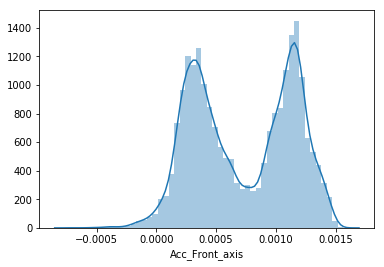

In [9]:
sns.distplot(X[Features1])
plt.show()

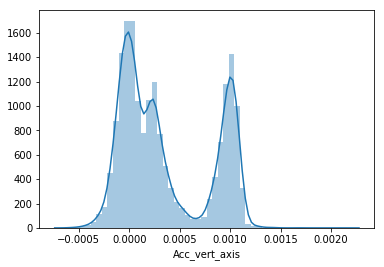

In [10]:
sns.distplot(X[Features2])
plt.show()
plt.show()

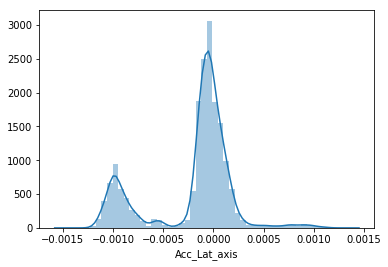

In [11]:
sns.distplot(X[Features3])
plt.show()

In [12]:
## Split the data between test and train split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size = 0.7,test_size =0.3,random_state =100)

#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [13]:
X_train.shape

(52589, 10)

In [14]:
Y_test.min()

Activity Label    1
dtype: int64

In [15]:
Model_Name="DNN Classifier"

#### 4. Model build & Evaluation 

- *We will be buidling below model and do the comparison between these model* 

1. Logistics Regression
2. KNN Classification Algorithm
3. SVM Algorithm
4. Random Forest
5. GBM
5. Deep Neural Network

**1.DNN CLassification Hyper tunning parameter**

In [16]:
import time


In [17]:
X_train.shape[1]

10

In [18]:
from sklearn.preprocessing import label_binarize
#y = label_binarize(Y, classes=[1, 2, 3,4])
Y_test=label_binarize(Y_test, classes=[1, 2, 3,4])
Y_train=label_binarize(Y_train, classes=[1, 2, 3,4])

In [19]:
Y_test

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [20]:
Y_test

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [21]:
## Build DNN model by using Keras
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization

start_time = time.time()

Model1 = Sequential()
## Add input layer

Model1.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))

## Add hidden layer
Model1.add(Dense(128, activation='relu'))
##Add 2nd hidden layer
Model1.add(Dense(196, activation='relu'))
### Add output layer
Model1.add(Dense(4, activation='sigmoid'))

# Compile the model
#Model1.compile(optimizer='adam', 
#              loss='sparse_categorical_crossentropy', 
#              metrics=['accuracy'])
Model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print(Model1.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 788       
Total params: 35,096
Trainable params: 35,096
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Fil model on Training data 

Model1.fit(X_train, Y_train, epochs=20)

#history = model.fit(X_train, y_train , epochs=22 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Epoch 1/20
52589/52589 [==============================] - 4s 81us/step - loss: 0.7614 - accuracy: 0.6917
Epoch 2/20
52589/52589 [==============================] - 4s 78us/step - loss: 0.6953 - accuracy: 0.7221
Epoch 3/20
52589/52589 [==============================] - 4s 80us/step - loss: 0.3343 - accuracy: 0.8810
Epoch 4/20
52589/52589 [==============================] - 4s 76us/step - loss: 0.2747 - accuracy: 0.8987
Epoch 5/20
52589/52589 [==============================] - 4s 79us/step - loss: 0.2594 - accuracy: 0.9047
Epoch 6/20
52589/52589 [==============================] - 4s 77us/step - loss: 0.2528 - accuracy: 0.9052
Epoch 7/20
52589/52589 [==============================] - 4s 81us/step - loss: 0.2451 - accuracy: 0.9092
Epoch 8/20
52589/52589 [==============================] - 4s 77us/step - loss: 0.2389 - accuracy: 0.9116
Epoch 9/20
52589/52589 [==============================] - 4s 79us/step - loss: 0.2341 - accuracy: 0.9130
Epoch 10/20
52589/52589 [==============================

In [23]:
# DNN

Model1.fit(X_train,Y_train)


Epoch 1/1
52589/52589 [==============================] - 4s 78us/step - loss: 0.2136 - accuracy: 0.9224


In [24]:
Model1_duration=time.time()-start_time

In [25]:
Model1_duration

86.49851584434509

In [26]:
## Predict train score for training data  
Y_train_pred=Model1.predict(X_train)

In [27]:
Y_test_pred=Model1.predict(X_test)

In [28]:
Y_test_pred

array([[9.7012520e-04, 1.9401312e-05, 3.6649707e-01, 4.5299530e-06],
       [8.1024468e-03, 4.9421787e-03, 1.0257065e-03, 1.9869208e-04],
       [1.4348307e-01, 5.5879384e-02, 2.6822090e-07, 2.4684414e-01],
       ...,
       [8.6003125e-02, 5.0649792e-02, 2.3245811e-06, 1.2482470e-01],
       [5.9649056e-01, 5.6387752e-02, 3.2782555e-07, 1.3672441e-02],
       [1.3594428e-02, 4.4105570e-07, 9.7284240e-01, 1.2243046e-04]],
      dtype=float32)

In [29]:
Y_test_pred = np.argmax(Y_test_pred,axis=1)

In [30]:
Y_test = np.argmax(Y_test,axis=1)

In [31]:
Y_train_pred = np.argmax(Y_train_pred,axis=1)

In [32]:
Y_train=np.argmax(Y_train,axis=1)

In [33]:
Y_train_pred.max()

3

In [34]:
Y_train

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [35]:
## Confusion matrix for Logistics regression
cm_Model = metrics.confusion_matrix(Y_test,Y_test_pred,labels=[0, 1, 2,3])
print(cm_Model)

[[ 4788    51    92    79]
 [  882   412     0   108]
 [  189     7 15230     0]
 [  409    18     5   269]]


In [36]:
#cm_logreg = pd.DataFrame(cm_logreg, index=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"], columns=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"])

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'Actual label')

Text(0.5, 0, 'Predicted label')

Text(0.5, 1.05, 'Accuracy Score: 0.9183637250987178')

<Figure size 720x720 with 0 Axes>

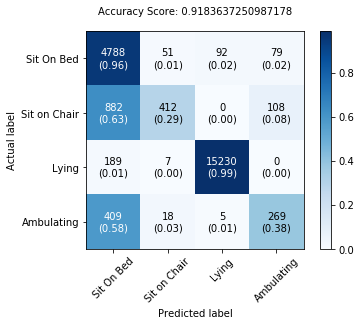

In [38]:
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(10,10))
class_names=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"]
ax = plot_confusion_matrix(cm_Model,
                                colorbar=True,show_normed=True ,class_names=class_names)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(Y_test,Y_test_pred))
plt.title(all_sample_title, size = 10);


File_Name=Model_Name+'_confusion.png'
plt.savefig(File_Name)

**precision**

 >The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
 
**Recall** 
 >The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**F-beta score**
 >The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.


In [39]:
from sklearn.metrics import classification_report
classificationReport = classification_report(Y_test, Y_test_pred, target_names=class_names,output_dict=True)

In [40]:
print(classificationReport)


{'Sit On Bed': {'precision': 0.7638800255264837, 'recall': 0.9556886227544911, 'f1-score': 0.8490867175031034, 'support': 5010}, 'Sit on Chair': {'precision': 0.8442622950819673, 'recall': 0.29386590584878747, 'f1-score': 0.435978835978836, 'support': 1402}, 'Lying': {'precision': 0.9936712990148104, 'recall': 0.9872941786594062, 'f1-score': 0.9904724742301565, 'support': 15426}, 'Ambulating': {'precision': 0.5899122807017544, 'recall': 0.38373751783166904, 'f1-score': 0.46499567847882456, 'support': 701}, 'micro avg': {'precision': 0.9183637250987178, 'recall': 0.9183637250987178, 'f1-score': 0.9183637250987178, 'support': 22539}, 'macro avg': {'precision': 0.7979314750812538, 'recall': 0.6551465562735884, 'f1-score': 0.6851334265477301, 'support': 22539}, 'weighted avg': {'precision': 0.9207416758936509, 'recall': 0.9183637250987178, 'f1-score': 0.9082105302285338, 'support': 22539}}


In [41]:
df_performance=pd.DataFrame(classificationReport)
df_performance=df_performance.reset_index()
print(df_performance)

       index   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0   f1-score     0.849087      0.435979      0.990472    0.464996   
1  precision     0.763880      0.844262      0.993671    0.589912   
2     recall     0.955689      0.293866      0.987294    0.383738   
3    support  5010.000000   1402.000000  15426.000000  701.000000   

      micro avg     macro avg  weighted avg  
0      0.918364      0.685133      0.908211  
1      0.918364      0.797931      0.920742  
2      0.918364      0.655147      0.918364  
3  22539.000000  22539.000000  22539.000000  


In [42]:
print(df_performance.head())

       index   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0   f1-score     0.849087      0.435979      0.990472    0.464996   
1  precision     0.763880      0.844262      0.993671    0.589912   
2     recall     0.955689      0.293866      0.987294    0.383738   
3    support  5010.000000   1402.000000  15426.000000  701.000000   

      micro avg     macro avg  weighted avg  
0      0.918364      0.685133      0.908211  
1      0.918364      0.797931      0.920742  
2      0.918364      0.655147      0.918364  
3  22539.000000  22539.000000  22539.000000  


In [43]:
#Logistics_df
df_performance.rename(columns={'index':'Perfomance Matrix'}, inplace=True)
df_performance

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,micro avg,macro avg,weighted avg
0,f1-score,0.849087,0.435979,0.990472,0.464996,0.918364,0.685133,0.908211
1,precision,0.763880,0.844262,0.993671,0.589912,0.918364,0.797931,0.920742
2,recall,0.955689,0.293866,0.987294,0.383738,0.918364,0.655147,0.918364
3,support,5010.000000,1402.000000,15426.000000,701.000000,22539.000000,22539.000000,22539.000000


In [44]:
df_performance=df_performance.append({'Perfomance Matrix':"Traing Accuracy" ,'macro avg' :accuracy_score(Y_train,Y_train_pred)},ignore_index = True)
print(df_performance)    

  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0          f1-score     0.849087      0.435979      0.990472    0.464996   
1         precision     0.763880      0.844262      0.993671    0.589912   
2            recall     0.955689      0.293866      0.987294    0.383738   
3           support  5010.000000   1402.000000  15426.000000  701.000000   
4   Traing Accuracy          NaN           NaN           NaN         NaN   

      micro avg     macro avg  weighted avg  
0      0.918364      0.685133      0.908211  
1      0.918364      0.797931      0.920742  
2      0.918364      0.655147      0.918364  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.917112           NaN  


In [45]:
Y_test

array([2, 2, 3, ..., 3, 0, 2], dtype=int64)

In [46]:
df_performance=df_performance.append({'Perfomance Matrix':"Test Accuracy" ,'macro avg' :accuracy_score(Y_test, Y_test_pred) },ignore_index = True)
print(df_performance)    

  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0          f1-score     0.849087      0.435979      0.990472    0.464996   
1         precision     0.763880      0.844262      0.993671    0.589912   
2            recall     0.955689      0.293866      0.987294    0.383738   
3           support  5010.000000   1402.000000  15426.000000  701.000000   
4   Traing Accuracy          NaN           NaN           NaN         NaN   
5     Test Accuracy          NaN           NaN           NaN         NaN   

      micro avg     macro avg  weighted avg  
0      0.918364      0.685133      0.908211  
1      0.918364      0.797931      0.920742  
2      0.918364      0.655147      0.918364  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.917112           NaN  
5           NaN      0.918364           NaN  


In [47]:
df_performance=df_performance.append({'Perfomance Matrix':"Model_Time" ,'macro avg' :Model1_duration },ignore_index = True)
print(df_performance)

  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0          f1-score     0.849087      0.435979      0.990472    0.464996   
1         precision     0.763880      0.844262      0.993671    0.589912   
2            recall     0.955689      0.293866      0.987294    0.383738   
3           support  5010.000000   1402.000000  15426.000000  701.000000   
4   Traing Accuracy          NaN           NaN           NaN         NaN   
5     Test Accuracy          NaN           NaN           NaN         NaN   
6        Model_Time          NaN           NaN           NaN         NaN   

      micro avg     macro avg  weighted avg  
0      0.918364      0.685133      0.908211  
1      0.918364      0.797931      0.920742  
2      0.918364      0.655147      0.918364  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.917112           NaN  
5           NaN      0.918364           NaN  
6           NaN     86.498516           NaN  


In [48]:
## Check False Positive/Negative True Postive/Negative

FP = cm_Model.sum(axis=0) - np.diag(cm_Model)  
FN = cm_Model.sum(axis=1) - np.diag(cm_Model)
TP = np.diag(cm_Model)
TN = cm_Model.sum() - (FP + FN + TP)

print(FP,FN,TP,TN)

[1480   76   97  187] [222 990 196 432] [ 4788   412 15230   269] [16049 21061  7016 21651]


In [49]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [50]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

PLR = TPR/(1-TNR)
print(PLR)


NLR =TNR/(1-TPR)
print(NLR)

OMR=(FP+FN)/(TP+FN+FP+TN)
print(OMR)

NNE=1/PPV

print(NNE)

[0.95568862 0.29386591 0.98729418 0.38373752]
[0.91556849 0.99640441 0.986363   0.99143694]
[0.76388003 0.8442623  0.9936713  0.58991228]
[0.98635609 0.95510408 0.97282307 0.98043744]
[0.08443151 0.00359559 0.013637   0.00856306]
[0.04431138 0.70613409 0.01270582 0.61626248]
[0.23611997 0.1557377  0.0063287  0.41008772]
[0.92448645 0.9527042  0.98700031 0.97253649]
[11.31909856 81.72952174 72.39818034 44.81315462]
[20.66215368  1.41106968 77.63079386  1.60879004]
[0.07551355 0.0472958  0.01299969 0.02746351]
[1.3091061  1.18446602 1.00636901 1.69516729]


In [51]:
df_performance.columns

Index(['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'micro avg', 'macro avg', 'weighted avg'],
      dtype='object')

In [52]:
df_performance=df_performance.append({'Perfomance Matrix':"Specificity" ,'Sit On Bed' :TNR[0] ,'Sit on Chair':TNR[1] ,'Lying':TNR[2],'Ambulating':TNR[3]},ignore_index = True)
print(df_performance)

  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0          f1-score     0.849087      0.435979      0.990472    0.464996   
1         precision     0.763880      0.844262      0.993671    0.589912   
2            recall     0.955689      0.293866      0.987294    0.383738   
3           support  5010.000000   1402.000000  15426.000000  701.000000   
4   Traing Accuracy          NaN           NaN           NaN         NaN   
5     Test Accuracy          NaN           NaN           NaN         NaN   
6        Model_Time          NaN           NaN           NaN         NaN   
7       Specificity     0.915568      0.996404      0.986363    0.991437   

      micro avg     macro avg  weighted avg  
0      0.918364      0.685133      0.908211  
1      0.918364      0.797931      0.920742  
2      0.918364      0.655147      0.918364  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.917112           NaN  
5           NaN      0.918364          

In [53]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative predictive value" ,'Sit On Bed' :NPV[0] ,'Sit on Chair':NPV[1] ,'Lying':NPV[2],'Ambulating':NPV[3]},ignore_index = True)
print(df_performance)

           Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                   f1-score     0.849087      0.435979      0.990472   
1                  precision     0.763880      0.844262      0.993671   
2                     recall     0.955689      0.293866      0.987294   
3                    support  5010.000000   1402.000000  15426.000000   
4            Traing Accuracy          NaN           NaN           NaN   
5              Test Accuracy          NaN           NaN           NaN   
6                 Model_Time          NaN           NaN           NaN   
7                Specificity     0.915568      0.996404      0.986363   
8  Negative predictive value     0.986356      0.955104      0.972823   

   Ambulating     micro avg     macro avg  weighted avg  
0    0.464996      0.918364      0.685133      0.908211  
1    0.589912      0.918364      0.797931      0.920742  
2    0.383738      0.918364      0.655147      0.918364  
3  701.000000  22539.000000  22539.00

In [54]:
df_performance=df_performance.append({'Perfomance Matrix':"Positive Likelihood Ratio" ,'Sit On Bed' :PLR[0] ,'Sit on Chair':PLR[1] ,'Lying':PLR[2],'Ambulating':PLR[3]},ignore_index = True)
print(df_performance)

           Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                   f1-score     0.849087      0.435979      0.990472   
1                  precision     0.763880      0.844262      0.993671   
2                     recall     0.955689      0.293866      0.987294   
3                    support  5010.000000   1402.000000  15426.000000   
4            Traing Accuracy          NaN           NaN           NaN   
5              Test Accuracy          NaN           NaN           NaN   
6                 Model_Time          NaN           NaN           NaN   
7                Specificity     0.915568      0.996404      0.986363   
8  Negative predictive value     0.986356      0.955104      0.972823   
9  Positive Likelihood Ratio    11.319099     81.729522     72.398180   

   Ambulating     micro avg     macro avg  weighted avg  
0    0.464996      0.918364      0.685133      0.908211  
1    0.589912      0.918364      0.797931      0.920742  
2    0.383738      0.9

In [55]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative likelihood ratio " ,'Sit On Bed' :NLR[0] ,'Sit on Chair':NLR[1] ,'Lying':NLR[2],'Ambulating':NLR[3]},ignore_index = True)
print(df_performance)

             Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                     f1-score     0.849087      0.435979      0.990472   
1                    precision     0.763880      0.844262      0.993671   
2                       recall     0.955689      0.293866      0.987294   
3                      support  5010.000000   1402.000000  15426.000000   
4              Traing Accuracy          NaN           NaN           NaN   
5                Test Accuracy          NaN           NaN           NaN   
6                   Model_Time          NaN           NaN           NaN   
7                  Specificity     0.915568      0.996404      0.986363   
8    Negative predictive value     0.986356      0.955104      0.972823   
9    Positive Likelihood Ratio    11.319099     81.729522     72.398180   
10  Negative likelihood ratio     20.662154      1.411070     77.630794   

    Ambulating     micro avg     macro avg  weighted avg  
0     0.464996      0.918364      0.6851

In [56]:
df_performance=df_performance.append({'Perfomance Matrix':"Overall Misclassification Ratio" ,'Sit On Bed' :OMR[0] ,'Sit on Chair':OMR[1] ,'Lying':OMR[2],'Ambulating':OMR[3]},ignore_index = True)
print(df_performance)

                  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                          f1-score     0.849087      0.435979      0.990472   
1                         precision     0.763880      0.844262      0.993671   
2                            recall     0.955689      0.293866      0.987294   
3                           support  5010.000000   1402.000000  15426.000000   
4                   Traing Accuracy          NaN           NaN           NaN   
5                     Test Accuracy          NaN           NaN           NaN   
6                        Model_Time          NaN           NaN           NaN   
7                       Specificity     0.915568      0.996404      0.986363   
8         Negative predictive value     0.986356      0.955104      0.972823   
9         Positive Likelihood Ratio    11.319099     81.729522     72.398180   
10       Negative likelihood ratio     20.662154      1.411070     77.630794   
11  Overall Misclassification Ratio     

In [57]:
from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[1, 2, 3,4])
y_test=label_binarize(Y_test, classes=[1, 2, 3,4])
n_classes = Y.shape[1]

In [58]:
y_test

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0]])

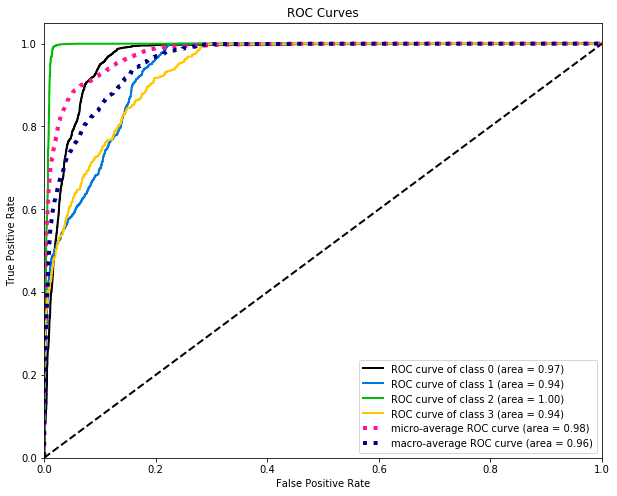

In [59]:
import scikitplot as skplt
y_probas = Model1.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
File_Name=Model_Name+'_ROC.png'
plt.savefig(File_Name)

In [60]:
y_probas

array([[9.7012520e-04, 1.9401312e-05, 3.6649707e-01, 4.5299530e-06],
       [8.1024468e-03, 4.9421787e-03, 1.0257065e-03, 1.9869208e-04],
       [1.4348307e-01, 5.5879384e-02, 2.6822090e-07, 2.4684414e-01],
       ...,
       [8.6003125e-02, 5.0649792e-02, 2.3245811e-06, 1.2482470e-01],
       [5.9649056e-01, 5.6387752e-02, 3.2782555e-07, 1.3672441e-02],
       [1.3594428e-02, 4.4105570e-07, 9.7284240e-01, 1.2243046e-04]],
      dtype=float32)

In [61]:
from sklearn.metrics import roc_auc_score
#auc = roc_auc_score(y_test, y_probas)

In [62]:
df_performance.columns

Index(['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'micro avg', 'macro avg', 'weighted avg'],
      dtype='object')

In [63]:
df_performance=df_performance.append({'Perfomance Matrix':"ROC curve_Avergae" ,'macro avg':0.95},ignore_index = True)
print(df_performance)

                  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                          f1-score     0.849087      0.435979      0.990472   
1                         precision     0.763880      0.844262      0.993671   
2                            recall     0.955689      0.293866      0.987294   
3                           support  5010.000000   1402.000000  15426.000000   
4                   Traing Accuracy          NaN           NaN           NaN   
5                     Test Accuracy          NaN           NaN           NaN   
6                        Model_Time          NaN           NaN           NaN   
7                       Specificity     0.915568      0.996404      0.986363   
8         Negative predictive value     0.986356      0.955104      0.972823   
9         Positive Likelihood Ratio    11.319099     81.729522     72.398180   
10       Negative likelihood ratio     20.662154      1.411070     77.630794   
11  Overall Misclassification Ratio     

In [64]:
df_performance

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,micro avg,macro avg,weighted avg
0,f1-score,0.849087,0.435979,0.990472,0.464996,0.918364,0.685133,0.908211
1,precision,0.763880,0.844262,0.993671,0.589912,0.918364,0.797931,0.920742
2,recall,0.955689,0.293866,0.987294,0.383738,0.918364,0.655147,0.918364
3,support,5010.000000,1402.000000,15426.000000,701.000000,22539.000000,22539.000000,22539.000000
4,Traing Accuracy,NaN,NaN,NaN,NaN,NaN,0.917112,NaN
5,Test Accuracy,NaN,NaN,NaN,NaN,NaN,0.918364,NaN
6,Model_Time,NaN,NaN,NaN,NaN,NaN,86.498516,NaN
7,Specificity,0.915568,0.996404,0.986363,0.991437,NaN,NaN,NaN
8,Negative predictive value,0.986356,0.955104,0.972823,0.980437,NaN,NaN,NaN
9,Positive Likelihood Ratio,11.319099,81.729522,72.398180,44.813155,NaN,NaN,NaN


In [65]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_probas[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_probas[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
   y_probas.ravel())
average_precision["micro"] = average_precision_score(y_test, y_probas,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.12


In [66]:
df_performance['Model1']="DNN Classifier"

In [69]:
df_performance['Data Type']= "Wearable Sensor Data"

df_performance['Data Type']= "Wearable Sensor Data"
File_Name="DNN_Classfier"
df_performance.to_csv(File_Name,index=False)